<a href="https://colab.research.google.com/github/maxwellfundi/AI-Course-2024/blob/main/Njiru_Maxwell_Fundi_Exersice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Data Pre-processing

In [2]:

# Read the data
df = pd.read_csv('/content/breast-cancer.txt')

# Drop the ID column
df.drop(['id'], axis=1, inplace=True)

# Replace the missing values and non-numeric values.
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.dropna(inplace=True)

# Create features and labels arrays
X = df.drop(['class'], axis=1).values
y = (df['class'] == 4).astype(int).values  # Using 4 as malignant

# Scale the features array using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Create a neural Network Model

In [3]:
def create_model(num_neurons=5, num_layers=1, activation='relu', drop_ratio=0.2):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(drop_ratio))

    #Changed this loop because if the number of layers is 1, then no batchnormalisation or additional layers will be added
    for _ in range(num_layers):
        model.add(BatchNormalization())
        model.add(Dense(num_neurons, activation=activation))
        model.add(Dropout(drop_ratio))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


# Experiment with different architectures

In [4]:
def train_and_evaluate(num_layers, num_neurons, num_epochs):
    print(f"Training model with {num_layers} layers and {num_neurons} neurons per layer...")
    model = create_model(num_neurons=num_neurons, num_layers=num_layers)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1, callbacks=[es])

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Plot training history
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

Training model with 3 layers and 50 neurons per layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 50)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,801 (34.38 KB)

 Trainable params: 8,501 (33.21 KB)

 Non-trainable params: 300 (1.17 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9709 - loss: 0.0979 
Test accuracy: 0.9635036587715149
Test loss 0.12192176282405853


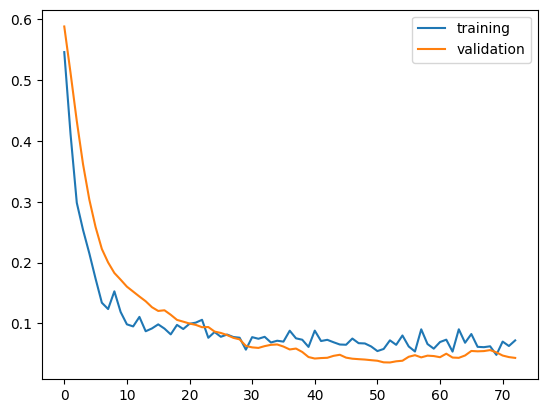

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Confusion Matrix:
[[85  4]
 [ 1 47]]


In [8]:
#from literature these numbers give the best results
num_layers = 3
num_neurons = 50
num_epochs = 100
train_and_evaluate(num_layers, num_neurons, num_epochs)

# Experiment with different dropout rates

In [9]:
def train_with_dropout(drop_ratio, num_epochs=100, num_layers=4, num_neurons=10):
    print(f'Training model with dropout rate of {drop_ratio}...')
    model = create_model(num_neurons=num_neurons, num_layers=num_layers, drop_ratio=drop_ratio)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1)

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Plot training history
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)


Training model with dropout rate of 0.2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711 (2.78 KB)

 Trainable params: 631 (2.46 KB)

 Non-trainable params: 80 (320.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9709 - loss: 0.0847 
Test accuracy: 0.9635036587715149
Test loss 0.10187067836523056


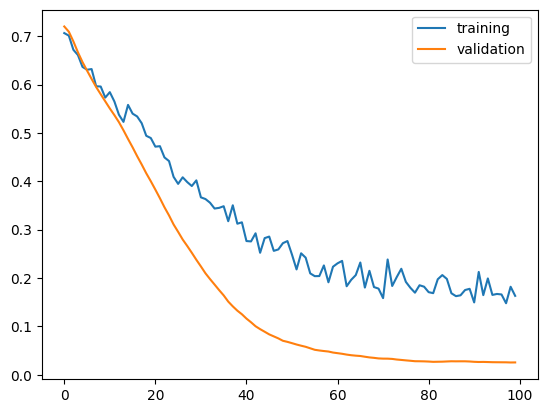

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Confusion Matrix:
[[85  4]
 [ 1 47]]


In [10]:
# Example Usage:
drop_ratio = 0.2  # or any value between 0 and 0.4 as per your previous loop
train_with_dropout(drop_ratio)

# Experiment with different activation functions - I have added two cels to have relu and tanh

#relu and tanh seem to be more accurate then sigmoid

In [11]:
def train_with_activation(activation_func, num_epochs=100, num_layers=2, num_neurons=10):
    print(f"Training model with {activation_func} activation function...")
    model = create_model(num_neurons=num_neurons, num_layers=num_layers, activation=activation_func)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1)

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Plot training history
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()
    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

Training model with sigmoid activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 40 (160.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1642 
Test accuracy: 0.9635036587715149
Test loss 0.17840491235256195


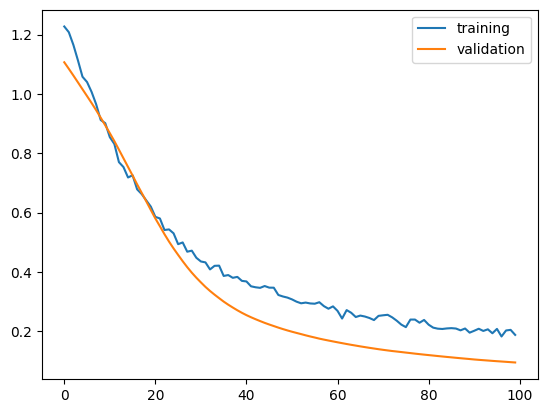

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix:
[[85  4]
 [ 1 47]]


In [12]:
# Example Usage:
activation = 'sigmoid'  # can be 'relu', 'tanh', or 'sigmoid'
train_with_activation(activation)

Training model with relu activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 40 (160.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9746 - loss: 0.1000 
Test accuracy: 0.970802903175354
Test loss 0.12391471862792969


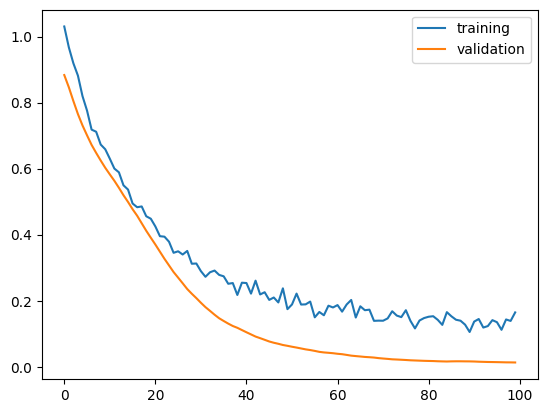

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Confusion Matrix:
[[85  4]
 [ 0 48]]


In [13]:
# Example Usage:
activation = 'relu'  # can be 'relu', 'tanh', or 'sigmoid'
train_with_activation(activation)

Training model with tanh activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 40 (160.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.1204 
Test accuracy: 0.970802903175354
Test loss 0.1418491005897522


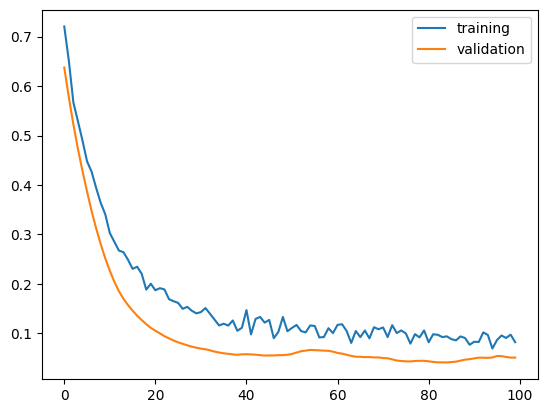

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Confusion Matrix:
[[85  4]
 [ 0 48]]


In [14]:
# Example Usage:
activation = 'tanh'  # can be 'relu', 'tanh', or 'sigmoid'
train_with_activation(activation)

# Implement early stopping

In [15]:
import seaborn as sns
def train_with_early_stopping_and_visualize(num_epochs=500, num_layers=4, num_neurons=10, patience=100):
    print("Training model with early stopping...")

# added the restore_best_weights=True to the earlystopping
    es = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model = create_model(num_neurons=num_neurons, num_layers=num_layers)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #here I changed the verbose to 0  to disbale the output.

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1, callbacks=[es])

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Visualization
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display confusion matrix visually
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



Training model with early stopping...
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                100       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_18 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dropout_26 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_19 (Ba  (None, 10)                40        
 tchNormalizatio

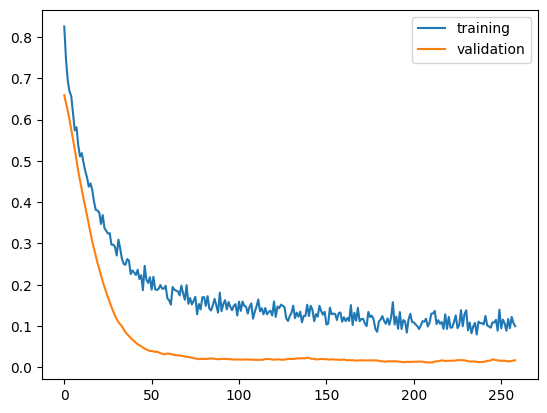

5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
[[85  4]
 [ 0 48]]


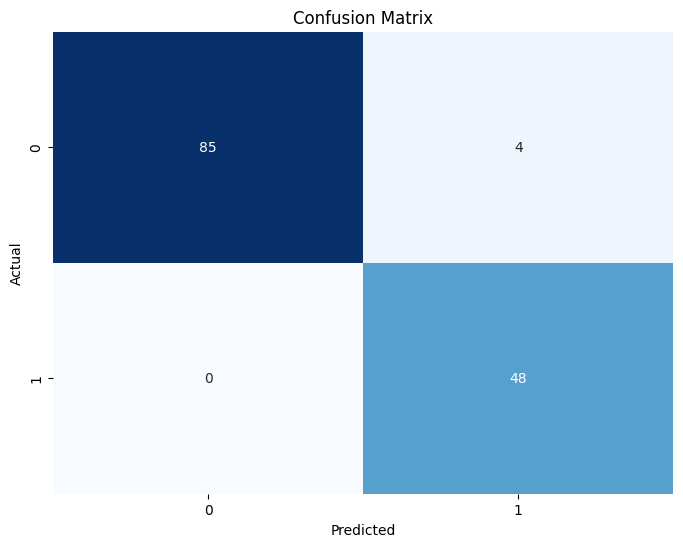

In [ ]:
train_with_early_stopping_and_visualize(patience=50)